In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as rd
from numpy import random as np_random
%matplotlib inline
from numba import njit
import time

Considere a distribuição log-logística
cuja densidade de probabilidade é dada por,
\begin{equation}
\rho(x)=\frac{\beta}{\alpha}\frac{(x/\alpha)^{\beta-1}}{\left(1+(x/\alpha)^{\beta}\right)^{2}}
\end{equation}
onde $x$ é uma variável aleatória real com suporte em $\mathbb{R}_{0}^{+}$.
O exponente $\beta$ limita o número de momentos finitos associados
a esta distribuição. 

1. Mostre que a distribuição de probabilidade cumulativa é dada por
\begin{equation}
C(x)=\frac{1}{1+\left(\frac{x}{\alpha}\right)^{-\beta}}
\end{equation}

A densidade de probabilidade da distribuição log-logística é dada por:

$$
\rho(x) = \frac{\beta}{\alpha} \left( \frac{x}{\alpha} \right)^{\beta-1} \left(1 + \left(\frac{x}{\alpha}\right)^\beta\right)^{-2}
$$

A distribuição de probabilidade cumulativa é dada por:

$$C(x) = \int_{-\infty}^{x} \rho(x') dx'$$

Para calcular esta integral, fazemos a substituição:

$$
u = \left(\frac{x'}{\alpha}\right)^\beta
$$


$$
du = \beta \left(\frac{x'}{\alpha}\right)^{\beta-1} \left(\frac{1}{\alpha}\right) dx'
$$

Agora, substituímos $u$ e $du$ na integral:

$$
C(x) = \int_{u(-\infty)}^{u(x')} \frac{\beta}{\alpha}\left(\frac{x'}{\alpha}\right)^{\beta - 1} \left(1+\left(\frac{x'}{\alpha}\right)^{\beta}\right)^{-2} \frac{du}{\beta \left(\frac{x'}{\alpha}\right)^{\beta-1} \left(\frac{1}{\alpha}\right)} =\int_{u(-\infty)}^{u(x')} \frac{1}{(1+u)^{2}} du
$$

Após resolvar a integral e substituir novamente u por $\frac{x'}{a}$, obtemos finalmente que a distribuição de probabilidade cumulativa da distribuição log-logística é dada por:

$$
C(x) = -\frac{1}{1 + \left(\frac{x}{\alpha}\right)^\beta} = \frac{1}{1 + \left(\frac{x}{\alpha}\right)^{-\beta}}
$$

2. Implemente o método de inversão e gere amostras para $\alpha=1$ e $\beta=\{1,1.6,2.1\}$. Compare os histogramas com a densidade de probabilidade exacta.

Para isto, utilizaremos a função inversa da distribuição de probabilidade.
\begin{equation}
C^{-1}(x) = \alpha\left(\frac{1-x}{x}\right)^{-\frac1\beta}
\end{equation}

Nota-se que o histograma apresentado tem uma grande precisão, se aproximando muito bem da distribuição exata.

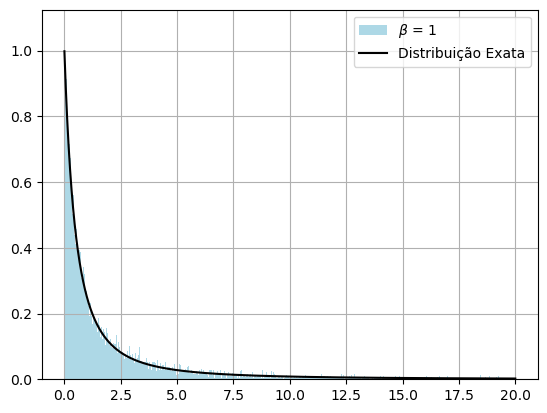

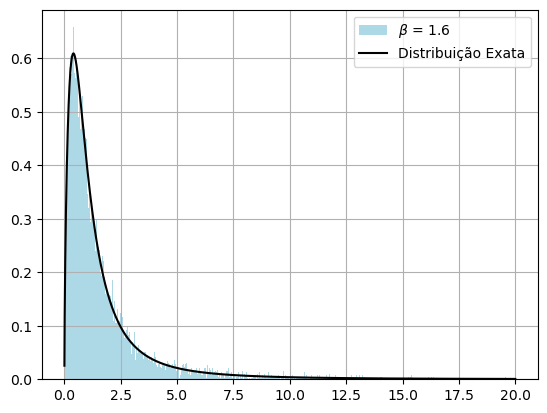

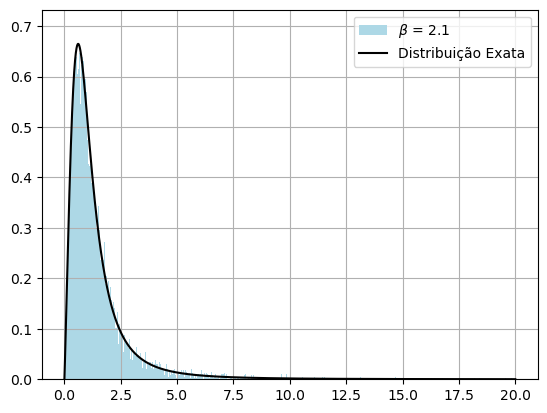

In [2]:
#inicio = time.time()
@njit
def cpd(x,a,b):
    return 1/(1+(x/a)**-b) 

@njit
def cpd2(u, a, b):
    return a*((1/u)-1)**(-1/b)

@njit
def pdf(x,a,b):
    return (b/a)* (((x/a)**(b-1)) / (1+(x/a)**b)**2)

beta = [1, 1.6, 2.1]
M, alfa = 10000, 1
valor = np.linspace(0.001, 20, M)    
r = rd.random_sample(10000)

for b in beta:
    plt.hist(cpd2(r, alfa, b), bins= 512, range=(0,20), density=True,color = 'lightblue', label = r'$\beta$ = {}'.format(b))
    plt.plot(valor, pdf(valor, alfa,b), color = 'k', label = 'Distribuição Exata')
    plt.legend()
    plt.grid()
    plt.show()

3. Podemos tentar estimar o valor médio a partir do cálculo do estimador
da média,
\begin{equation}
\overline{X}_{N}=\frac{1}{N}\sum_{i=1}^{N}x_{i}.
\end{equation}
para uma amostra finita, o estimador é ele próprio uma variável aleatória
pelo que tem uma distribuição de probabilidade. Considerando experiências
nas quais que gera $N$ eventos e para cada uma calcula o estimador
do valor médio, obtenha, um histograma de frequências para cada uma
destas experiências, considerando, 

$\qquad$ a) $\beta=1$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

Para estimar o valor médio, faz-se o somatório:

\begin{equation}
\overline{X}_{N}=\frac{1}{N}\sum_{i=1}^{N}x_{i}.
\end{equation}

no qual o $x_{i}$ será os valores da função cpd2(x, a, b) onde o argumento x será uma amostra gerada aleatoriamente de comprimento $n$ para cada valor de $N = [1, 4, 16, 64, 256, 1024, 4096]$. Espera-se que a medida que $N$ aumenta, os valores convirjam para um valor, o que é observado nos gráficos abaixo.

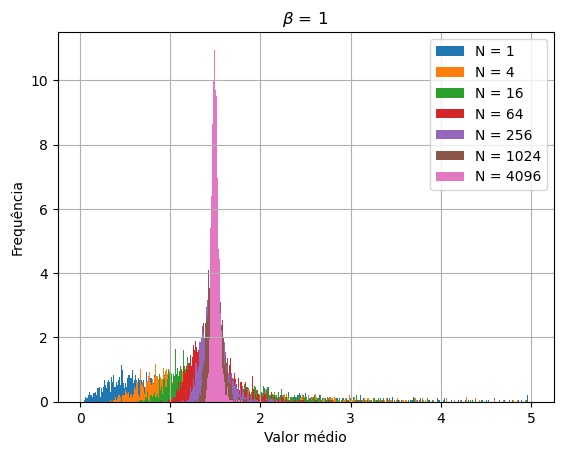

In [3]:
M = 2048
beta = 1
a = 1
N = [1, 4, 16, 64, 256, 1024, 4096]
for pos, n in enumerate(N):
    media = np.zeros(M)
    for i in range(M):
        amostra = cpd2(rd.random_sample(n), a, b)
        media[i] = np.sum(amostra)/n
    plt.hist(media, bins = 512, range=(0, 5), density=True, label = f'N = {n}')
plt.title(r'$\beta$ = {}'.format(beta))
plt.legend()
plt.xlabel('Valor médio')
plt.ylabel('Frequência')
plt.grid()
plt.show()     

$\qquad$ b) $\beta=1.6$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

Responda aqui

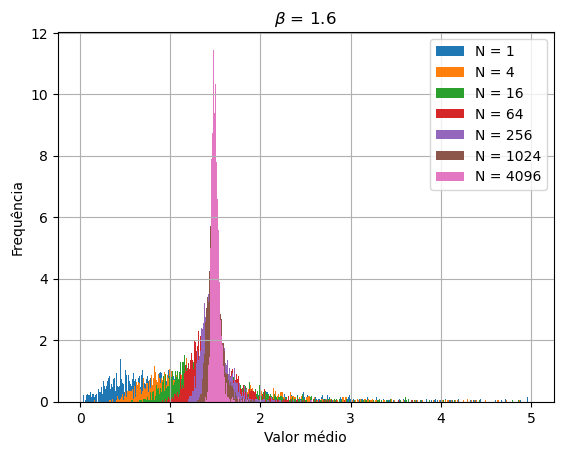

In [4]:
M = 2048
xm = np.zeros(M)
beta = 1.6
a = 1
N = [1, 4, 16, 64, 256, 1024, 4096]
for pos, n in enumerate(N):
    media = np.zeros(M)
    for i in range(M):
        amostra = cpd2(rd.random_sample(n), a, b)
        media[i] = np.sum(amostra)/n
    plt.hist(media, bins = 512, range=(0, 5), density=True, label = f'N = {n}')
plt.title(r'$\beta$ = {}'.format(beta))
plt.legend()
plt.xlabel('Valor médio')
plt.ylabel('Frequência')
plt.grid()
plt.show()         

$\qquad$ c) $\beta=2.1$ e comparando $N=\{1,4,16,64,256,1024,4096\}.$

Responda Aqui

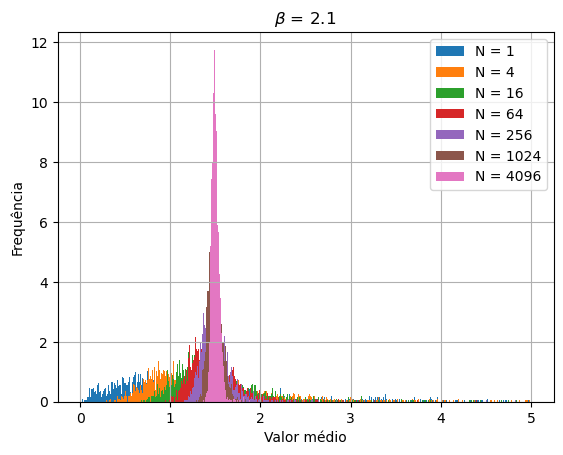

In [5]:
M = 2048
xm = np.zeros(M)
beta = 2.1
a = 1
N = [1, 4, 16, 64, 256, 1024, 4096]
for pos, n in enumerate(N):
    media = np.zeros(M)
    for i in range(M):
        amostra = cpd2(rd.random_sample(n), a, b)
        media[i] = np.sum(amostra)/n
    plt.hist(media, bins = 512, range=(0, 5), density=True, label = f'N = {n}')
plt.title(r'$\beta$ = {}'.format(beta))
plt.legend()
plt.xlabel('Valor médio')
plt.ylabel('Frequência')
plt.grid()
plt.show()       

4. O que conclui da observações que fez? Em quais das situações é possível determinar um valor médio? Porquê?

Observa-se que quanto maior for o $N$, menos variação da média se tem, portanto, podemos determinar um valor médio com maior confiança para maiores valores de $N$. Para determinar um valor médio, é necessário escolher um valor de $N$ grande, porque desta maneira, mesmo para valores de $\beta$ distintos, tem-se uma maior confiança relativamente ao valor médio. A partir dos gráficos, também podemos chegar a conclusão do teorema do limite central, a medida que $N$ aumenta, os valores ficam mais precisos e tendem a uma distribuição mais uniforme (Gaussiana). Nota-se que, quanto maior o valor de $N$ os valores do valor médio ficam centrados a volta do valor teórico, o que mostra ser uma distribuição uniforme de dados.

In [6]:
# Valores para Beta = 2.1. Entretanto ao mudar beta, mudam-se os valores da array.
M = 2048
beta = 2.1
a = 1
N = [1, 4, 16, 64, 256, 1024, 4096]
for pos, n in enumerate(N):
    media = np.zeros(M)
    for i in range(M):
        amostra = cpd2(rd.random_sample(n), a, b)
        media[i] = np.sum(amostra)/n
    print(media)
    print('--- Próximo N ---')

[2.07465682 0.98243154 0.94875501 ... 1.10286259 1.17227524 4.39220568]
--- Próximo N ---
[4.3323542  1.6277722  0.5582506  ... 1.45360716 0.95066485 1.3512474 ]
--- Próximo N ---
[1.07577971 1.46942656 2.1370666  ... 2.44999686 1.50111191 1.51574071]
--- Próximo N ---
[1.27550971 1.95921055 1.49741044 ... 1.42250785 1.33491992 1.37487947]
--- Próximo N ---
[1.4333206  1.34073431 1.41126138 ... 1.49300349 1.49121092 1.45391173]
--- Próximo N ---
[1.53183458 1.48446709 1.49906179 ... 1.51032235 1.48279618 1.43170047]
--- Próximo N ---
[1.50535011 1.5053395  1.4207351  ... 1.4846261  1.48916853 1.51413964]
--- Próximo N ---


5. Considerando o caso em que $\beta=2.1$, represente como função de $N$
o desvio padrão da amostra de medidas de $\overline{X}_{N}$. Qual
o significado deste comportamento para a medição de um valor médio?

Nota-se que quanto menor o  $N$, maior o desvio padrão relacionado, e, por consequência, quanto maior o $N$, menor o desvio padrão. O desvio padrão fornece informações importantes sobre o comportamento dos valores médios. Um baixo desvio padrão indica que os valores medidos estão próximos da média, como pode ser visto com $N$ grande, indicando uma medição precisa. Também podemos notar que o desvio padrão diminui de forma proporcional a $1/\sqrt N$. Portanto, se $N$ for suficientemente grande, nós teremos um valor médio de facto muito próximo da média.

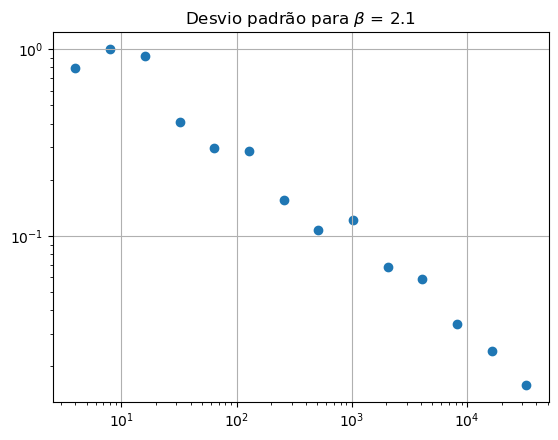

 Valores do desvio: [0.78830548 1.00405372 0.92119204 0.40833665 0.29649229 0.28432511
 0.15663189 0.10713851 0.12190998 0.06778573 0.05884145 0.03368782
 0.02432498 0.01594425]


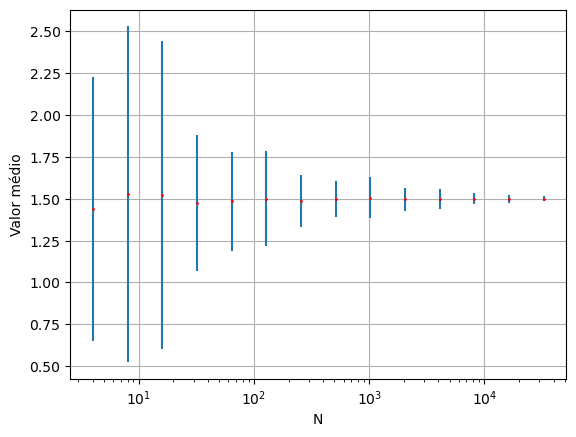

In [7]:
M, beta, alfa = 512, 2.1, 1
N = 2 ** np.arange(2, 16)
desvio = np.zeros(len(N))
valor_medio = np.zeros(len(N))

for pos, n in enumerate(N):
    media = np.zeros(M)
    for i in range(M):
        amostra = cpd2(rd.random_sample(n), a, b)
        media[i] =np.sum(amostra) / n
        
    desvio[pos] = np.std(media)
    valor_medio[pos] = np.average(media)
    
plt.scatter(N, desvio)
plt.title(r'Desvio padrão para $\beta$ = 2.1')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.show()
print(f' Valores do desvio: {desvio}')

plt.errorbar(N, valor_medio, desvio, fmt = 'o', ms = 1, mfc ='red', mec = 'red')
plt.xlabel('N')
plt.ylabel('Valor médio')
plt.grid()
plt.xscale('log')
plt.show()

6. Repita a análise anterior para $\beta=1.6$. O que conclui neste caso? Será possível medir um valor médio? Como compatibiliza com o resultado anterior? Afinal é possível ou não medir este valor médio? Será que uma análise de percentis é útil?

Para $\beta = 1.6$, os valores do desvio padrão são um pouco menores. Para $\beta = 1.6$, o valor do desvio padrão fica ligeiramente mais preciso, o que pode ser visto analisando o gráfico do valor médio para $\beta = 1.6$ e $\beta = 2.1$ (Exercício $1.3$). Para medir um valor médio, é necessário utilizar um $N$ suficientemente grande para termos um valor de alta confiança. A escolha de um $N$ suficientemente grande tem como fundamento o teorema do limite central, portanto ao escolher um alto valor de $N$ comprovamos este teorema. Uma análise de percentis neste caso poderia ser útil, já que nos daria informações úteis, como a mediana (percentil 50). Entretanto, os nossos dados já possuem uma precisão suficientemente boa, a qual não se mostra necessário a análise de percentis.

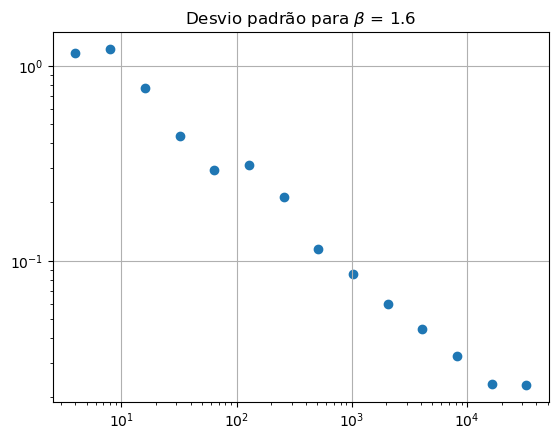

 Valores do desvio: [1.15895251 1.22063545 0.77231889 0.43536388 0.29254041 0.31076757
 0.21118021 0.11546451 0.08519867 0.06016077 0.04475615 0.03247453
 0.02321926 0.02308502]


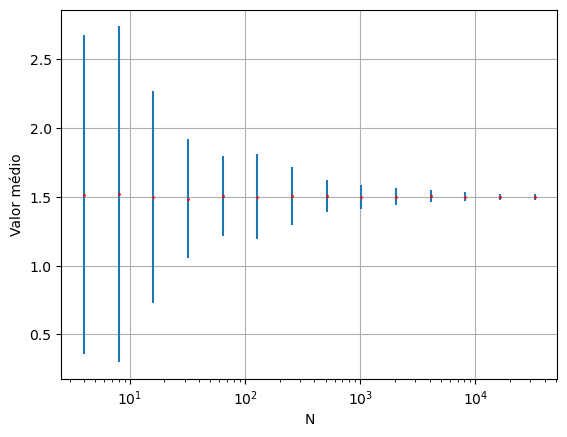

In [8]:
M, beta, alfa = 512, 1.6, 1
N = 2 ** np.arange(2, 16)
desvio = np.zeros(len(N))
valor_medio = np.zeros(len(N))

for pos, n in enumerate(N):
    media = np.zeros(M)
    for i in range(M):
        amostra = cpd2(rd.random_sample(n), a, b)
        media[i] =np.sum(amostra) / n
        
    desvio[pos] = np.std(media)
    valor_medio[pos] = np.average(media)
    
plt.scatter(N, desvio)
plt.title(r'Desvio padrão para $\beta$ = 1.6')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.show()
print(f' Valores do desvio: {desvio}')

plt.errorbar(N, valor_medio, desvio, fmt="o", ms=1, mfc="red", mec="red")
plt.xlabel("N")
plt.ylabel("Valor médio")
plt.grid()
plt.xscale('log')
plt.show()

A função característica da distribuição
de probabilidade da média de $N$ variáveis é dada por, 
\begin{equation}
\phi(k,N)=\left(\int_{0}^{+\infty}dx\rho(x)e^{-i\frac{k}{N}x}\right)^{N}=\phi^{N}\left(\frac{k}{N},1\right),
\end{equation}
Para estimar o integral é possível calcular usar o método de amostragem
por importância para cada valor de $k$. Considerando $\beta=1.6$
e $\beta=2.1$:

1. Calcule como função de $k$ o integral da função característica de
$\rho(x)$ e estime a barra de erro usando $128$ medidas. Represente
os pontos com as respectivas barras de erro. 

Observando a função $\rho(x)$ podemos notar que ela decai mais rapidamente do que o exponencial $e^{-i\frac{k}{N}x}$. Isto se dá pelo denominador $(1+(\frac{x}{\alpha})^{\beta})^2$ que aumenta muito mais rapidamente do que o numerador $(\frac{x}{\alpha})^{\beta -1}$.
Portanto, podemos concluir que o integral converge uma vez que a função $\rho(x)$ decai mais rapidamente que a exponencial à medida que k aumenta. 
Para realizar os cálculos, faremos a seguinte aproximação do integral:

\begin{equation}
\int_{0}^{+\infty}dx\rho(x)e^{-i\frac{k}{N}x}
\end{equation}

Que pode ser escrito como:

\begin{equation}
\frac1N\sum_{i=1}^Ne^{-i\frac kN x_i}
\end{equation}


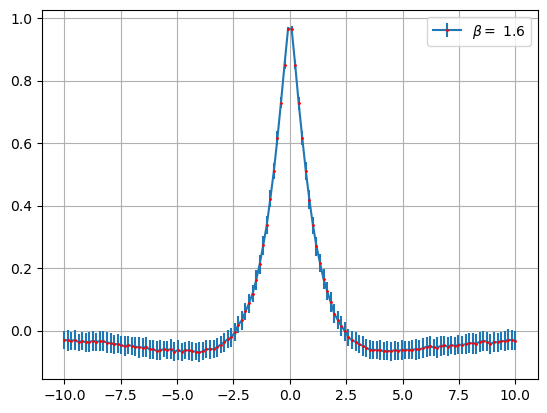

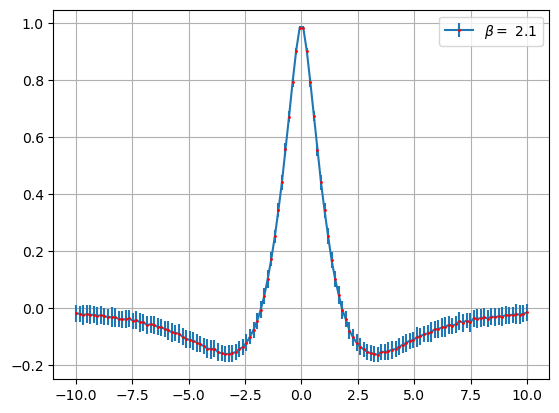

In [9]:
beta = [1.6, 2.1]
M, N, a = 512, 128, 1
k = np.linspace(-10, 10, N)

def C_F(k, M, a, b):
    integral = np.zeros(len(k))
    erro = np.zeros(len(k))
    for pos, ki in enumerate(k):
        phi = np.zeros(N)
        for i in range(N):
            amostra = cpd2(rd.random_sample(M), a, b)
            phi[i] = np.real(np.sum(np.exp(-1j * ki* amostra)) / M)
        integral[pos] = np.average(phi)
        erro[pos] = np.std(phi)
        
    return integral, erro

for b in beta:
    resultado = C_F(k, M, a, b)      
    plt.errorbar(k, np.real(resultado[0]), yerr = resultado[1],fmt = 'o-', ms = 1, mec = 'red', label=r'$\beta = $ {}'.format(b))
    plt.legend()
    plt.grid()
    plt.show()

2. Sendo $\phi(k)$ uma função complexa, $\phi(k,N)$ também será. Considerando
que escreve $\phi=re^{i\Theta}$, ou seja, à custa de uma parte real
e uma fase, 
\begin{equation}
\phi(k,N)=r^{N}\left(\frac{k}{N}\right)e^{iN\Theta(k/N)},
\end{equation}
represente $R(k,N)=r^{N}\left(k/N\right)$ e $N\Theta(k/N)$ como
função de $k$ para diferentes valores de $N$. O que observa?

A fase dependerá de $k$, portanto espera-se um declive e ordenada na origem ($ = 0$). Para diferentes valores de $N$, o gráfico curva-se, o que pode ser visto devido a multiplicação do $N$. Já as magnitudes, à medida que $N$ aumenta o gráfico tende a ficar linear, isto se dá ao facto do exponencial $N$.

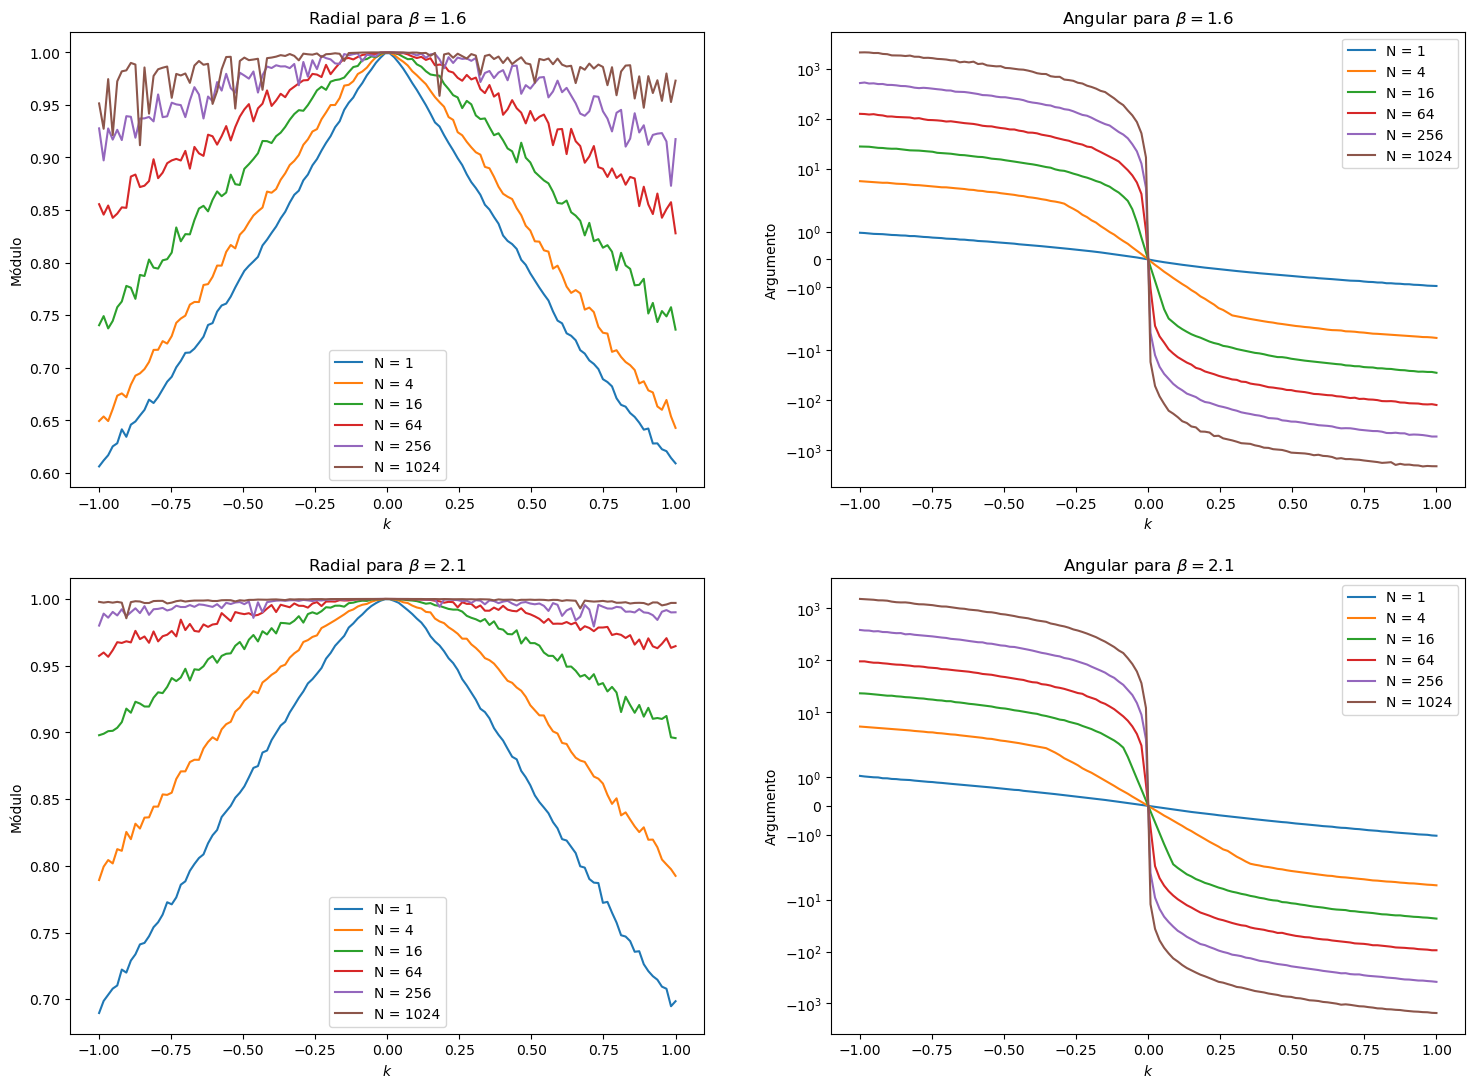

In [10]:
M, Ns, alpha = 200, 128, 1
k = np.linspace(-1, 1, Ns)
N =[1, 4, 16, 64, 256, 1024]
pos_graf = -1
cols = 2
rows = 2 * len(N)
plt.figure(figsize = (9 * cols, 7 * rows))
for b in [1.6, 2.1]:
    pos_graf += 2
    for n in N:
        R, fase= [], []
        for ki in k:
            integral = np.empty(M, dtype=np.complex128)
            for i in range(M):
                amostra = cpd2(rd.random_sample(M), a, b)
                integral[i] = np.sum(np.exp(-1j * (ki/n) * amostra))/M
            valor = (np.average(integral))**n
            R.append(np.abs(valor))
            fase.append(np.angle(valor) * n)
            
        plt.subplot(rows, cols, pos_graf)
        plt.title(f"Radial para $\\beta = {b}$")
        plt.plot(k, R, label=f"N = {n}")
        plt.xlabel("$k$")
        plt.ylabel("Módulo")
        plt.legend()
        
        plt.subplot(rows, cols, pos_graf+1)
        plt.title(f"Angular para $\\beta = {b}$")
        plt.plot(k, fase, label=f"N = {n}")
        plt.xlabel("$k$")
        plt.ylabel("Argumento")
        plt.yscale('symlog')
        plt.legend()
        
plt.show()
#fim = time.time()
#tempo_decorrido = fim - inicio
#print(f"Tempo decorrido: {tempo_decorrido} segundos")